<a href="https://colab.research.google.com/github/ghazalna/Deep-Learning/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Defining the data in a dictionary format
data = {
    "Model": ["ViT", "ResNet", "VGG16"],
    "Accuracy (%)": ["90-95", "93-96", "89-93"],
    "Loss (approx.)": ["0.1-0.2", "0.05-0.1", "0.1-0.2"],
    "Learning Rate": ["0.001 to 0.0003", "0.1 with decay", "0.001 with decay"],
    "Batch Size": ["64 or 128", "128 or 256", "64 or 128"],
    "Optimizer": ["Adam/AdamW", "SGD with momentum 0.9", "Adam/SGD with momentum 0.9"],
    "Epochs": ["100-300", "200-300", "200-300"],
    "Weight Decay": ["-", "0.0001 to 0.0005", "0.0005"],
    "Data Augmentation": ["Yes", "Yes", "Yes"],
    "Normalization": ["Layer Normalization", "Batch Normalization", "Batch Normalization"],
    "Regularization": ["Dropout 0.1-0.3", "None", "Dropout 0.5"]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Accuracy (%),Loss (approx.),Learning Rate,Batch Size,Optimizer,Epochs,Weight Decay,Data Augmentation,Normalization,Regularization
0,ViT,90-95,0.1-0.2,0.001 to 0.0003,64 or 128,Adam/AdamW,100-300,-,Yes,Layer Normalization,Dropout 0.1-0.3
1,ResNet,93-96,0.05-0.1,0.1 with decay,128 or 256,SGD with momentum 0.9,200-300,0.0001 to 0.0005,Yes,Batch Normalization,None
2,VGG16,89-93,0.1-0.2,0.001 with decay,64 or 128,Adam/SGD with momentum 0.9,200-300,0.0005,Yes,Batch Normalization,Dropout 0.5


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# **Load Data**

In [33]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

# **Normalization**

In [34]:
x_train , x_test = x_train/255.0 , x_test /255.0       # for pictures use 255.0

# **OneHot Code**

In [35]:
#Categorical

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **Data augmentation**

In [36]:
datagen = ImageDataGenerator(rotation_range = 15,
                           width_shift_range = 0.1,
                           height_shift_range = 0.1,
                           horizontal_flip = True)
datagen.fit(x_train)

In [37]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# **ResNet**



In [38]:
from tensorflow.keras.applications import ResNet50

In [9]:
def creat_resnet50_model(input_shape=(32,32,3), num_class=10):
    base_model = ResNet50(include_top=False, weights=None, input_shape=input_shape)
    base_model.trainable=True

    model = models.Sequential([
         base_model,
         layers.GlobalAveragePooling2D(),
         layers.Dense(512, activation='relu'),
         layers.BatchNormalization(),
         layers.Dropout(0.5),
         layers.Dense(num_class, activation='softmax')
     ])

    return model

# **Build Model**

In [10]:
resnet50_model = creat_resnet50_model()

In [11]:
resnet50_model.compile(optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9),
                   loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
resnet50_model.fit(datagen.flow(x_train, y_train, batch_size=128),
                                      epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 169ms/step - accuracy: 0.1199 - loss: 3.2321 - val_accuracy: 0.1405 - val_loss: 2.2317
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 105ms/step - accuracy: 0.2041 - loss: 2.1473 - val_accuracy: 0.2290 - val_loss: 2.0596
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.2722 - loss: 1.9336 - val_accuracy: 0.3011 - val_loss: 1.8049
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.3188 - loss: 1.8140 - val_accuracy: 0.3814 - val_loss: 1.6852
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.3523 - loss: 1.7415 - val_accuracy: 0.3902 - val_loss: 1.6321
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.3748 - loss: 1.6950 - val_accuracy: 0.3818 - val_loss: 1.6741
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.3906 - loss: 1.6700 - val_accuracy: 0.3745 - val_loss: 1.7328
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.3942 - loss: 1.6583 - va

In [16]:
loss, accuracy = resnet50_model.evaluate(x_test, y_test)
print(f'ResNet50 Model - Loss: {loss}, Accuracy: {accuracy}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4652 - loss: 1.4786
ResNet50 Model - Loss: 1.4767528772354126, Accuracy: 0.4661000072956085


# **Display predictions for ResNet50 model**

In [20]:
def display_pred(model, model_name):
    num_images=5
    indices = np.random.choice(len(x_test), num_images)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]

    predictions = model.predict(sample_images)
    predictions_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Model: {model_name}\nPredict: {class_names[predictions_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


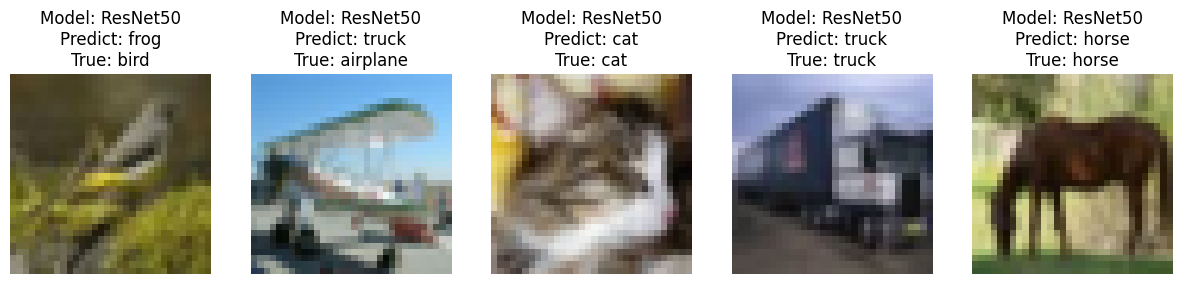

In [21]:
# Display predictions for ResNet50 model
display_pred(resnet50_model, "ResNet50")

# #PreTrained Model

In [39]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                   loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(datagen.flow(x_train, y_train, batch_size=128),
                                      epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 158ms/step - accuracy: 0.2395 - loss: 2.5009 - val_accuracy: 0.1071 - val_loss: 2.3559
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 109ms/step - accuracy: 0.5736 - loss: 1.2362 - val_accuracy: 0.2724 - val_loss: 2.2801
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.6667 - loss: 0.9631 - val_accuracy: 0.7362 - val_loss: 0.7752
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.7086 - loss: 0.8569 - val_accuracy: 0.7576 - val_loss: 0.7274
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.7385 - loss: 0.7676 - val_accuracy: 0.7584 - val_loss: 0.7329
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.7602 - loss: 0.7095 - val_accuracy: 0.7661 - val_loss: 0.6977
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.7730 - loss: 0.6645 - val_accuracy: 0.7899 - val_loss: 0.6145
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.7883 - loss: 0.6228 - val

In [42]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'ResNet50 Model - Loss: {loss}, Accuracy: {accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8055 - loss: 0.5954
ResNet50 Model - Loss: 0.5875993371009827, Accuracy: 0.8058000206947327


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


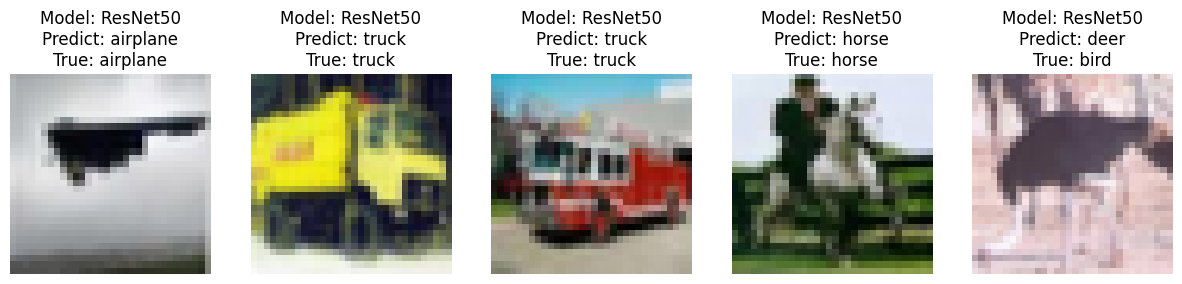

In [43]:
# Display predictions for ResNet50 model
display_pred(model, "ResNet50")

In [ ]:
# first attempt:            Loss: 2.303596019744873, Accuracy: 0.10000000149011612
# Unfreeze Some Layers:     Loss: 2.135432481765747, Accuracy: 0.2676999866962433
# Fully Unfreeze the Model: Loss: 0.5875993371009827, Accuracy: 0.8058000206947327
